<font color="#CA3532"><h1 align="center">**Aprendizaje por Refuerzo**</h1></font>
<font color="#6E6E6E"><h2 align="center">**Práctica 2: Multiarmed Bandits**</h2></font>
<center> <h4>Luis Sánchez Polo</h4> </center>
<center> <h4>María José Damián Diez</h4> </center>
<center> <h5>21 de mayo de 2023</h5> </center>

# **Multiarmed bandits para Credit Scoring**

El objetivo es construir un sistema automático de aprendizaje por refuerzo para gestionar un sistema de concesión de créditos.
La idea es que cuando un cliente contacte con el banco para solicitar un crédito, el sistema se lo conceda (acción 1) o no (acción 0).
Por tanto el sistema de aprendizaje por refuerzo tiene **dos posibles acciones**.

Por otra parte, el reward obtenido es:

- 0 si el sistema decide no ofrecerle el crédito al cliente
- 1 si se le ofrece el crédito y **lo paga**
- -10 si se le ofrece crédito y **no lo paga**

Para construir el sistema disponemos del siguiente dataset: https://drive.google.com/file/d/1TdTDAjndt5sn_7HKwc1PifcaQTRNHzkR/view?usp=sharing


A continuación se descarga y muestra:

In [ ]:
COLAB = True

In [ ]:
import pandas as pd
pd.options.display.max_colwidth = 200

# Descargamos dataset:
aux = "'https://docs.google.com/uc?export=download&id=1000WA5q8DTZ68uoPaXddJ1TLJPBsIZpr&confirm=t'"
!wget -q $aux -O ./cs.csv
aux = "'https://docs.google.com/uc?export=download&id=11SdrmYpGwW7xC6Nooe6aRBkORBnirrkm&confirm=t'"
!wget -q $aux -O ./DataDictionary.csv

**Información sobre cada variable:**

In [ ]:
info_variables = pd.read_csv("DataDictionary.csv", sep=";").set_index("Variable Name")
info_variables

,Unnamed: 0,Description,Type
Variable Name,,,
SeriousDlqin2yrs,0,Person experienced 90 days past due delinquency or worse,Y/N
RevolvingUtilizationOfUnsecuredLines,1,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
age,2,Age of borrower in years,integer
NumberOfTime30-59DaysPastDueNotWorse,3,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
DebtRatio,4,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
MonthlyIncome,5,Monthly income,real
NumberOfOpenCreditLinesAndLoans,6,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
NumberOfTimes90DaysLate,7,Number of times borrower has been 90 days or more past due.,integer
NumberRealEstateLoansOrLines,8,Number of mortgage and real estate loans including home equity lines of credit,integer


**Base de datos:**

In [ ]:
df = pd.read_csv("./cs.csv")
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [ ]:
df.describe().T[["count", "min", "max", "mean", "std"]]

,count,min,max,mean,std
SeriousDlqin2yrs,150000.0,0.0,1.0,0.066840,0.249746
RevolvingUtilizationOfUnsecuredLines,150000.0,0.0,50708.0,6.048438,249.755371
age,150000.0,0.0,109.0,52.295207,14.771866
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.0,98.0,0.421033,4.192781
DebtRatio,150000.0,0.0,329664.0,353.005076,2037.818523
MonthlyIncome,120269.0,0.0,3008750.0,6670.221237,14384.674215
NumberOfOpenCreditLinesAndLoans,150000.0,0.0,58.0,8.452760,5.145951
NumberOfTimes90DaysLate,150000.0,0.0,98.0,0.265973,4.169304
NumberRealEstateLoansOrLines,150000.0,0.0,54.0,1.018240,1.129771
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.0,98.0,0.240387,4.155179


In [ ]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [ ]:
(df["MonthlyIncome"].isna() & df["NumberOfDependents"].isna()).sum()

3924

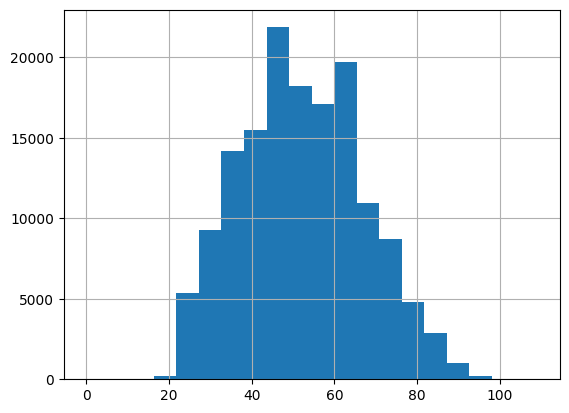

In [ ]:
df["age"].hist(bins=20);

In [ ]:
df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [ ]:
# limpieza básica:
#
# 1- Eliminamos filas con missing values (MonthlyIncome y NumberOfDependents)
# 2- Nos quedamos solo con personas de 18 a 70 años (incluidos)
# 3- Eliminamos filas que tengan 96 o 98 en columnas de retraso
#    (NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse,
#     NumberOfTimes90DaysLate)

df.dropna(inplace=True)
df = df[ (df["age"]>=18) & (df["age"]<=70) ]

df = df[ ~df["NumberOfTime30-59DaysPastDueNotWorse"].isin([96, 98]) ]
df = df[ ~df["NumberOfTime60-89DaysPastDueNotWorse"].isin([96, 98]) ]
df = df[ ~df["NumberOfTimes90DaysLate"].isin([96, 98]) ]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,107883.0,0.073728,0.261329,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,107883.0,6.262285,268.425237,0.0,0.042982,0.206481,0.617870,50708.0
age,107883.0,48.343835,11.909195,21.0,39.000000,49.000000,58.000000,70.0
NumberOfTime30-59DaysPastDueNotWorse,107883.0,0.276781,0.739606,0.0,0.000000,0.000000,0.000000,13.0
DebtRatio,107883.0,27.426863,395.986811,0.0,0.162018,0.308917,0.493251,60212.0
MonthlyIncome,107883.0,6800.816625,14941.921271,0.0,3500.000000,5500.000000,8344.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,107883.0,8.774265,5.155074,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,107883.0,0.098588,0.509666,0.0,0.000000,0.000000,0.000000,17.0
NumberRealEstateLoansOrLines,107883.0,1.095233,1.157615,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,107883.0,0.072106,0.348840,0.0,0.000000,0.000000,0.000000,11.0


La columna **SeriousDlqin2yrs** es 0 si el cliente paga el crédito, y 1 si no lo paga.

Ahora dividimos el dataset en training y test:

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=1, test_size=0.3, stratify=df["SeriousDlqin2yrs"])

In [ ]:
# frecuencia de impagos en training y test (en tanto por 1):
df_train["SeriousDlqin2yrs"].mean(), df_test["SeriousDlqin2yrs"].mean()

(0.07373076617495167, 0.073721612853391)

In [ ]:
# Defino clase clientes:

class clientes:
    def __init__(self, df): # self: parámetros internos
        # mi clase va a tener dos parámetros internos:
        # i, df
        self.i = -1 # i: contador (de clientes); índice al último cliente mostrado
        self.df = df
    def cliente(self): # va a simular que llega un cliente
        self.i = self.i + 1
        if self.i == len(self.df):
            self.i = 0
    def get_context(self): # va a extraer datos de ese cliente
        return self.df.iloc[self.i].drop("SeriousDlqin2yrs")
    def get_reward(self, accion): # reward con ese cliente
        # calculo reward:
        if accion==0: # no se da crédito
            return 0
        # se da crédito:
        if self.df.iloc[self.i]["SeriousDlqin2yrs"] == 1: # no paga
            return -10
        return 1 # paga

In [ ]:
# clientes: una clase
# cl_train: una instancia de esa clase
# cl_test: otra instancia de esa clase
#
# podemos ver cl_train como una "caja" donde hemos
# metido el dataset de entrenamiento y va a haber
# métodos que me permiten interaccionar con él
#
# Lo mismo con cl_test, pero para los datos de test

cl_train = clientes(df_train)
cl_test  = clientes(df_test)

In [ ]:
cl_train.cliente() # simulo que llega un cliente nuevo

In [ ]:
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines        0.064833
age                                        59.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.156957
MonthlyIncome                           16666.000000
NumberOfOpenCreditLinesAndLoans             5.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                1.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          2.000000
Name: 135262, dtype: float64

In [ ]:
cl_train.get_context().values

array([6.48325870e-02, 5.90000000e+01, 0.00000000e+00, 1.56956861e-01,
       1.66660000e+04, 5.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 2.00000000e+00])

In [ ]:
cl_train.cliente()
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines       0.209079
age                                       30.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.129946
MonthlyIncome                           2400.000000
NumberOfOpenCreditLinesAndLoans            7.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               0.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
Name: 14308, dtype: float64

In [ ]:
cl_train.get_reward(1)

1

# **Tareas a realizar**

1- Calcula la evolución del reward total y regret total en training de:
 a) un algoritmo aleatorio
 b) un algoritmo que siempre da el crédito
 c) un algoritmo que nunca da el crédito

 Calcula en otra gráfica la evolución de su reward promedio y regret promedio. ¿Tienen sentido los resultados?

2- Entrena un multiarmed bandit **no contextual** en training. Calcula las mismas métricas que en el punto 1. ¿Cuál es la estrategia que aprende el modelo?

3- Entrena un multiarmed bandit contextual lineal en training. Calcula las mismas métricas que en los puntos anteriores

4- Calcula, para algunos clientes de training, las Q dadas por el modelo para cada acción. Chequea si obtienes los mismos valores calculándolos tú. Chequea si la acción elegida por el modelo es la de mayor Q.

5- Calcula en test el rendimiento del algoritmo de multiarmed bandit. Compáralo con el grupo de control de test (reserva un 10% de clientes en test como grupo de control).

6- Obtén la interpretabilidad del modelo. ¿En qué variables se está fijando para decidir?

7- Qué ocurre en los puntos anteriores si ahora la penalización cuando el banco da un crédito a un cliente que no paga es -1? ¿Y si se va haciendo aún más pequeña la penalización?

8- Optimiza tu sistema haciendo selección de variables.

9- (Opcional). Investiga otras librerías que permitan implementar multiarmed bandits contextuales no lineales.

### Tarea 1

In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# a) algoritmo aleatorio 
N = 50000
reward_total = 0
regret_total = 0
N_Credito = 0
Credito = 0
for _ in range(N):
  c = cl_train.cliente()
  accion = np.random.choice(2)
  if accion == 1:
    Credito += 1
  else:
    N_Credito += 1

  reward = cl_train.get_reward(accion)
  reward_total += reward
  regret_total += (1 - reward)

print("Reward promedio:", reward_total/N)
print("Regret promedio:", regret_total/N)
print("Cantidad de credito dados:", Credito)
print("Cantidad de credito no dados:", N_Credito)

Reward promedio: 0.09492
Regret promedio: 0.90508
Cantidad de credito dados: 25030
Cantidad de credito no dados: 24970


El reward promedio teórico sería $\frac{1}{2}(0 + 1\cdot(1-0.073728) - 10\cdot 0.073728) = 0.094496$.

In [ ]:
# b) algoritmo que siempre da el crédito
N = 50000
reward_total = 0
regret_total = 0
for _ in range(N):
  c = cl_train.cliente()
  accion = 1
  reward = cl_train.get_reward(accion)
  reward_total += reward
  regret_total += 0

print("Reward promedio:", reward_total/N)
print("Regret promedio:", regret_total/N)

Reward promedio: 0.20228
Regret promedio: 0.0


El reward promedio teórico sería $1\cdot(1-0.073728) - 10\cdot 0.073728 = 0.188992$.

In [ ]:
# c) algoritmo que nunca da el crédito
N = 50000
reward_total = 0
regret_total = 0
for _ in range(N):
  c = cl_train.cliente()
  accion = 0
  reward = cl_train.get_reward(accion)
  reward_total += reward
  regret_total += (1 - reward)

print("Reward promedio:", reward_total/N)
print("Regret promedio:", regret_total/N)

Reward promedio: 0.0
Regret promedio: 1.0


100%|██████████| 50000/50000 [00:03<00:00, 14142.65it/s]


Cantidad de credito dados: 25009
Cantidad de credito no dados: 24991
Reward promedio: 0.09912


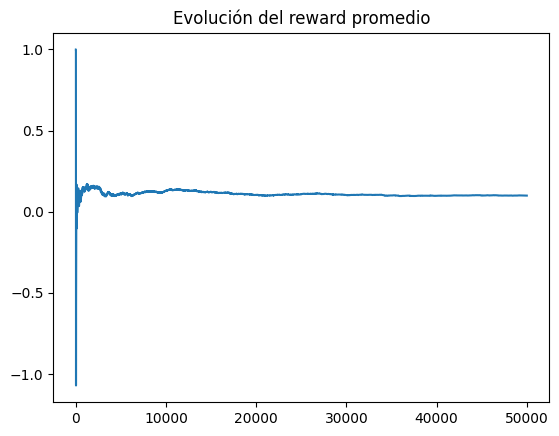

Regret promedio: 0.90088


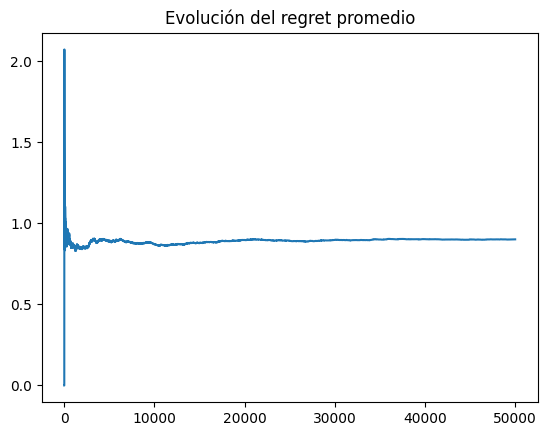

In [ ]:
N = 50000
n_acciones_posibles = 2

reward_total = 0
reward_promedio = []
regret_total = 0
regret_promedio = []

N_Credito = 0
Credito = 0

for i in tqdm(range(N)):
  c = cl_train.cliente()
  accion = np.random.randint(0,n_acciones_posibles)
  if accion == 1:
    Credito += 1
  else:
    N_Credito += 1
  reward = cl_train.get_reward(accion)
  reward_total += reward
  reward_promedio.append(reward_total/(i+1))
  regret = (1 - reward)
  regret_total += regret
  regret_promedio.append(regret_total/(i+1))

print("Cantidad de credito dados:", Credito)
print("Cantidad de credito no dados:", N_Credito)
print("Reward promedio:", reward_total/N)
plt.plot(reward_promedio)
plt.title("Evolución del reward promedio")
plt.show()
print("Regret promedio:", regret_total/N)
plt.plot(regret_promedio)
plt.title("Evolución del regret promedio")
plt.show()

**Respuesta:** 

En los valores obtenidos, podemos ver que el algoritmo *si otorga crédito* casi en las mismas proporciones que cuando *no otorga crédito*, esto se debe a que la acción se escoge de manera aleatoria entre los valores 0 y 1. En la gráfica de *Rewards promedio* podemos observar que al aumentar los episodios (N) el promedio se vuelve constante y de un valor cercano a  0, esto es debido a que como en la opción de *si otorgar crédito* tiene dos posibles rewards dado, el caso de pago o no pago, pero en medidas distintas, ya que el no pago castiga con un reward de -10. 

**Nota:** 

Cálculo de Regret: En la práctica no podemos saber el valor óptimo de la acción, ya que no tenemos como cuantificar dicha ganancia, por lo que en este trabajo supondremos que el argumento máximo de las Q será cuando la acción es 1, que es cuando se otorga el crédito y el cliente paga. 

### Tarea 2

In [ ]:
class MultiArmedBandit:
    def __init__(self, epsilon, num_actions):
        self.epsilon = epsilon
        self.num_actions = num_actions
        self.action_counts = np.zeros(num_actions)
        self.action_rewards = np.zeros(num_actions)
        self.Qs = np.zeros(num_actions) - 10

    def choose_action(self):
        if np.random.rand() < self.epsilon: # exploramos?
          return np.random.choice(self.num_actions)
        return np.argmax(self.Qs)

    def update(self, action, reward):
        self.action_counts[action] += 1
        self.action_rewards[action] += reward
        self.Qs[action] = self.action_rewards[action] / self.action_counts[action] # recalculamos la Q

In [ ]:
def train_bandit(bandit, df, sel_clientes):
    rewards = 0
    total_rewards = []
    rewards_promedio = []
    regret_total = 0
    regret_promedio = []
    historico_acciones   = []
    Q_cliente = []
    nombre = []

    client = clientes(df)
    
    for _ in tqdm(range(len(df))):
        action = bandit.choose_action()
        reward = client.get_reward(action)
        bandit.update(action, reward)
        rewards += reward
        nombre.append(client.get_context().name)
        total_rewards.append(rewards)
        rewards_promedio.append(rewards/(_+1))
        regret = (1 - reward)
        regret_total += regret
        regret_promedio.append(regret_total/(_+1))
        historico_acciones.append(action)
        Q_cliente.append(bandit.Qs)
        client.cliente()
       
    print("Reward promedio:", rewards/len(df))
    print("Regret promedio:", regret_total/len(df))

    plt.plot(total_rewards)
    plt.title("Refuerzo total acumulado")
    plt.show()
    plt.plot(rewards_promedio)
    plt.title("Refuerzo promedio")
    plt.show()
    plt.plot(regret_promedio)
    plt.title("Regret promedio")
    plt.show()

    return nombre, total_rewards, Q_cliente, rewards_promedio, regret_promedio, historico_acciones

100%|██████████| 75518/75518 [01:05<00:00, 1161.64it/s]


Reward promedio: 0.18294976032204244
Regret promedio: 0.8170502396779575


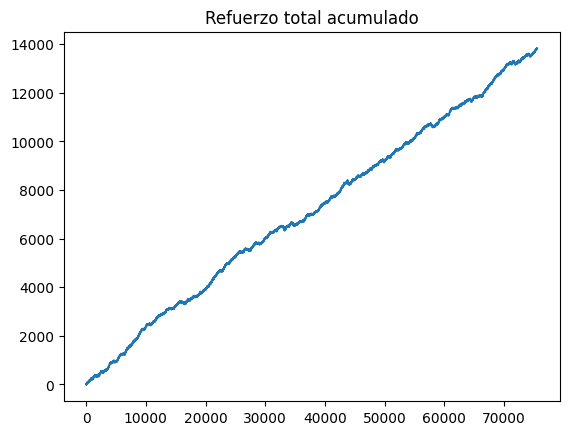

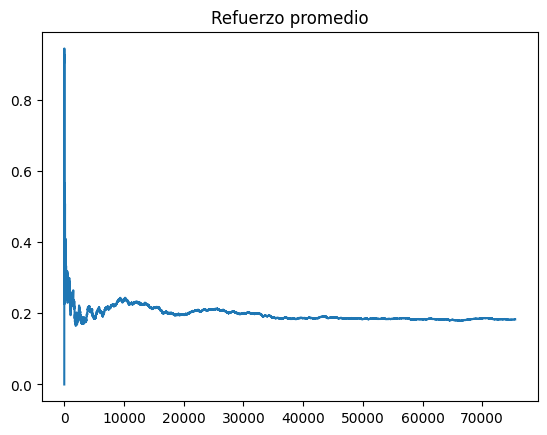

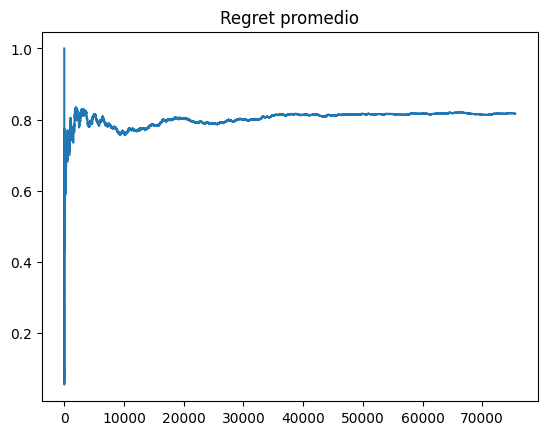

In [ ]:
bandit = MultiArmedBandit(0.1, num_actions=2)  # Dos acciones: no se da crédito (0) o se da crédito (1)

nom, rewards, Q_cliente, historico_r_promedio, historico_regret, historico_acciones = train_bandit(bandit, df_train, [6, 7, 8])


In [ ]:
import collections
c = collections.Counter(historico_acciones)

print(c.items())

dict_items([(0, 3842), (1, 71676)])


In [ ]:
# Porcentaje de veces que no otorga crédito
3842/(71676+3842)

0.05087528801080537

**Respuesta:** 

Se puede observar en la grafica de *Refuerzo total acumulado* que el crecimiento es casi lineal, por lo que se puede deducir que el modelo otorga el crédito la mayoría de las veces. Hemos comprobado esto con el histórico de acciones, donde se observa que el porcentaje de veces que *no otorga crédito* es estrictamente menor que de las personas que incurren en impago, por lo que el banco pierde dinero con este modelo. 

### Tarea 3

In [ ]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd

    gdd.download_file_from_google_drive(file_id='1fCnGzS5U_x-k_03op_XJkHVS4jpvjSxS',
                                        dest_path='./spacebandits.zip', unzip=True)

Unzipping...Done.


In [ ]:
from space_bandits import LinearBandits

Instructions for updating:
non-resource variables are not supported in the long term


100%|██████████| 75518/75518 [41:31<00:00, 30.31it/s]


Reward promedio: 0.5294102068381048


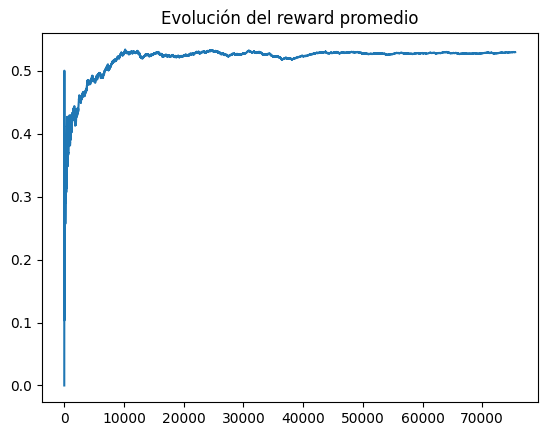

Regret promedio: 0.4705897931618952


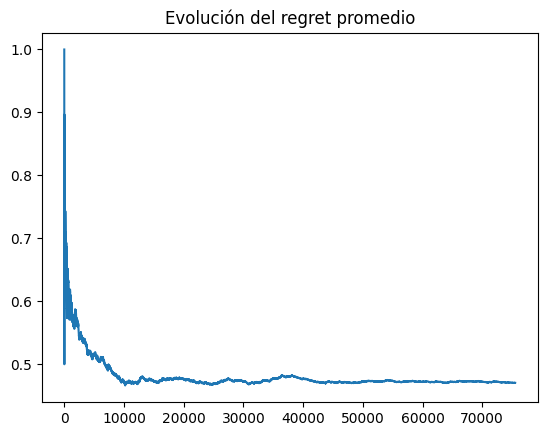

In [ ]:
client = clientes(df_train)
n_acciones = 2 
n_features = len(client.get_context())

agente = LinearBandits(n_acciones, n_features, initial_pulls=100) # initial_pulls: duración de la fase de exploración pura
reward_promedio = []
reward_total = 0
regret_promedio = []
regret_total = 0
N = len(df_train)

for i in tqdm(range(N)):
  contexto = client.get_context().values
  accion = agente.action(contexto) # choose_action
  reward = client.get_reward(accion)
  agente.update(contexto, accion, reward) # actualización del modelo

  reward_total += reward
  reward_promedio.append(reward_total/(i+1)) # i+1 es el número de iteraciones
  regret = 1 - reward
  regret_total += regret 
  regret_promedio.append(regret_total/(i+1))
  client.cliente() # cliente con el que contacto

print("Reward promedio:", reward_total/N)
plt.plot(reward_promedio)
plt.title("Evolución del reward promedio")
plt.show()
print("Regret promedio:", regret_total/N)
plt.plot(regret_promedio)
plt.title("Evolución del regret promedio")
plt.show()

In [ ]:
from space_bandits import load_linear_model
agente.save('model_LinearBandits.pkl')
agente = load_linear_model('model_LinearBandits.pkl')

**Nota:** 

Cálculo de Regret: En la práctica no podemos saber el valor óptimo de la acción, ya que no tenemos como cuantificar dicha ganancia, por lo que en este trabajo supondremos que el argumento máximo de las Q será cuando la acción es 1, que es cuando se otorga el crédito y el cliente paga, por tanto lo que obtenemos es una cota.

### Tarea 4

In [ ]:
auxs = []
for a in range(n_acciones):
    aux = "Q_estimada(acción={}) = {:.2f}{}{:.2f}·RevolvingUtilizationOfUnsecuredLines{}{:.2f}·age{}{:.2f}·NumberOfTime30-59DaysPastDueNotWorse{}{:.2f}·DebtRatio{}{:.2f}·MonthlyIncome{}{:.2f}·NumberOfOpenCreditLinesAndLoans{}{:.2f}·NumberOfTimes90DaysLate{}{:.2f}·NumberRealEstateLoansOrLines{}{:.2f}·NumberOfTime60-89DaysPastDueNotWorse{}{:.2f}·NumberOfDependents"
    pars = agente.mu[a]
    mas0 = ' + ' if pars[0]>=0 else ' '
    mas1 = ' + ' if pars[1]>=0 else ' '
    mas2 = ' + ' if pars[0]>=0 else ' '
    mas3 = ' + ' if pars[1]>=0 else ' '
    mas4 = ' + ' if pars[0]>=0 else ' '
    mas5 = ' + ' if pars[1]>=0 else ' '
    mas6 = ' + ' if pars[0]>=0 else ' '
    mas7 = ' + ' if pars[1]>=0 else ' '
    mas8 = ' + ' if pars[0]>=0 else ' '
    mas9 = ' + ' if pars[1]>=0 else ' '

    aux2 = aux.format(a,
                      agente.mu[a][-1], mas0,
                      agente.mu[a][0], mas1,
                      agente.mu[a][1], mas2,
                      agente.mu[a][2], mas3,
                      agente.mu[a][3], mas4,
                      agente.mu[a][4], mas5,
                      agente.mu[a][5], mas6,
                      agente.mu[a][6], mas7,
                      agente.mu[a][7], mas8,
                      agente.mu[a][8], mas9,
                      agente.mu[a][9]) 
    print(aux2)
    aux2 = aux2.replace("RevolvingUtilizationOfUnsecuredLines","{:.2f}")
    aux2 = aux2.replace("age","{:.2f}")
    aux2 = aux2.replace("NumberOfTime30-59DaysPastDueNotWorse","{:.2f}")
    aux2 = aux2.replace("DebtRatio","{:.2f}")
    aux2 = aux2.replace("MonthlyIncome","{:.2f}")
    aux2 = aux2.replace("NumberOfOpenCreditLinesAndLoans","{:.2f}")
    aux2 = aux2.replace("NumberOfTimes90DaysLate","{:.2f}")
    aux2 = aux2.replace("NumberRealEstateLoansOrLines","{:.2f}")
    aux2 = aux2.replace("NumberOfTime60-89DaysPastDueNotWorse","{:.2f}")
    aux2 = aux2.replace("NumberOfDependents","{:.2f}")
    auxs.append(aux2)

Q_estimada(acción=0) = 0.00 + 0.00·RevolvingUtilizationOfUnsecuredLines + 0.00·age + 0.00·NumberOfTime30-59DaysPastDueNotWorse + 0.00·DebtRatio + 0.00·MonthlyIncome + 0.00·NumberOfOpenCreditLinesAndLoans + 0.00·NumberOfTimes90DaysLate + 0.00·NumberRealEstateLoansOrLines + 0.00·NumberOfTime60-89DaysPastDueNotWorse + 0.00·NumberOfDependents
Q_estimada(acción=1) = 0.72 -0.86·RevolvingUtilizationOfUnsecuredLines + 0.01·age -0.37·NumberOfTime30-59DaysPastDueNotWorse + 0.00·DebtRatio 0.00·MonthlyIncome + -0.01·NumberOfOpenCreditLinesAndLoans -3.98·NumberOfTimes90DaysLate + -0.04·NumberRealEstateLoansOrLines -1.26·NumberOfTime60-89DaysPastDueNotWorse + 0.00·NumberOfDependents


In [ ]:
def selec_client(n):
  c = clientes(df_train)
  for i in range(n):
    c.cliente()
  return c

In [ ]:
def comparacion(cliente):

  contexto = cliente.get_context()
  print("\033[1m\033[94mCliente:\033[0m", cliente.get_context().name)
  aux = "Contexto cliente (RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents) = ({:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f})\n"
  print(aux.format(contexto[0], contexto[1], contexto[2], contexto[3], contexto[4], contexto[5], contexto[6], contexto[7], contexto[8], contexto[9]))
  print("Qs estimadas por el modelo (método expected values):")
  Qs = agente.expected_values(contexto)
  for a in range(n_acciones):
      print("  * Q_estimada(acción={}) = {}".format(a,Qs[a].round(3)))
  print()
  key1, key2, key3, key4, key5, key6, key7, key8, key9, key10 = contexto
  print("Qs estimadas a mano con los coeficientes del modelo:")
  alphas = agente.mu
  for a in range(n_acciones):
      Q = alphas[a][-1] + alphas[a][0]*key1 + alphas[a][1]*key2 + alphas[a][
          2]*key3 + alphas[a][3]*key4 + alphas[a][4]*key5 + alphas[a][
              5]*key6 + alphas[a][6]*key7 + alphas[a][7]*key8 + alphas[a][
                  8]*key9 + alphas[a][9]*key10
      print("  * "+auxs[a].format(key1, key2, key3, key4, key5, key6, key7,
                                  key8, key9, key10)+" = "+str(Q.round(3)))

  print()
  print("Acción elegida por el modelo:", agente.predict(contexto, thompson=False))
  print()
  print()


In [ ]:
lista_clientes = [18, 100, 40674]
for c in lista_clientes:
  cliente = selec_client(c)
  comparacion(cliente)

Cliente: 147429
Contexto cliente (RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents) = (0.45,56.00,0.00,0.44,7200.00,15.00,0.00,2.00,0.00,2.00)

Qs estimadas por el modelo (método expected values):
  * Q_estimada(acción=0) = 0.0
  * Q_estimada(acción=1) = 0.454

Qs estimadas a mano con los coeficientes del modelo:
  * Q_estimada(acción=0) = 0.00 + 0.00·0.45 + 0.00·56.00 + 0.00·0.00 + 0.00·0.44 + 0.00·7200.00 + 0.00·15.00 + 0.00·0.00 + 0.00·2.00 + 0.00·0.00 + 0.00·2.00 = 0.0
  * Q_estimada(acción=1) = 0.72 -0.86·0.45 + 0.01·56.00 -0.37·0.00 + 0.00·0.44 0.00·7200.00 + -0.01·15.00 -3.98·0.00 + -0.04·2.00 -1.26·0.00 + 0.00·2.00 = 0.454

Acción elegida por el modelo: 1


Cliente: 53562
Contexto cliente (RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio

**Respuesta:**

En el Multiarmed Bandit contextual lineal se aproxima Q por una función lineal

\begin{equation}
Q_\theta(s,a) = \phi(s,a)^T\theta\approx Q(s,a),
\end{equation}

donde los parámetros $\theta$ de cada bandit se estiman mediante regresión por
mínimos cuadrados

\begin{equation}
\theta_t = A_t^{-1}b_t,
\end{equation}

donde

\begin{equation}
A_t = \sum_{\tau=1}^t\phi(s_\tau,a_\tau)\phi(s_\tau,a_\tau)^T \quad \text{y} \quad b_t=\sum_{\tau=1}^t\phi(s_\tau,a_\tau)r_\tau.
\end{equation}

Para la acción de "no dar crédito", el refuerzo asociado es $0$, por lo que $b_t=0$ y, por tanto, $\theta=0$, como se puede ver dos celdas más arriba.

En la celda siguiente, hemos calculado para tres clientes y para cada acción la $Q$ dada por el modelo lineal según

 \begin{equation}
Q_\theta(s,a) = \phi(s,a)^T\theta
\end{equation}

y también la que calcula el modelo entrenaddo, viendo que efectivamente coinciden y que se toma en todos los ejemplos la acción con mayor $Q$.

### Tarea 5

In [ ]:
agente = load_linear_model('model_LinearBandits.pkl')

In [ ]:
# Test
reward_total_test = 0
regret_total_test = 0
num_clientes_control = int(0.1 * len(df_test))
df_control = df_test.sample(n=num_clientes_control, random_state=42)

for _, row in tqdm(df_test.iterrows()):
    contexto = row.drop("SeriousDlqin2yrs").values
    accion = agente.action(contexto)
    reward = client.get_reward(accion)
    reward_total_test += reward
    regret = 1 - reward
    regret_total_test += regret

# Rendimiento promedio en test y control
reward_promedio_test = reward_total_test / len(df_test)
regret_promedio_test = regret_total_test / len(df_test)
reward_promedio_control = df_control["SeriousDlqin2yrs"].mean()
regret_promedio_control = 1 - reward_promedio_control

print("Rendimiento Test:")
print("Reward promedio:", reward_promedio_test)
print("Regret promedio:", regret_promedio_test)

print("Rendimiento del grupo de control:")
print("Reward promedio:", reward_promedio_control)
print("Regret promedio:", regret_promedio_control)

29129it [00:46, 632.23it/s]

Rendimiento Test:
Reward promedio: 0.8239211782072848
Regret promedio: 0.17607882179271517
Rendimiento del grupo de control:
Reward promedio: 0.0673076923076923
Regret promedio: 0.9326923076923077


**Respuesta:**

Efectivamente comprobamos que el reward es mucho mayor cuando tenemos el contexto. El modelo es capaz de predecir, en base al resto de variables, si un cliente tiene tendencia o no a devolver el crédito, y con ellos afina mucho mejor sus acciones y por tanto el reward. 

### Tarea 6

Observando los resultados obtenidos en la **respuesta 4**, podemos ver que cuando la acción es 1, las características del cliente con la mayor importancia son *RevolvingUtilizationOfUnsecuredLines*, *NumberOfTime30-59DaysPastDueNotWorse*, *NumberOfTimes90DaysLate*, *NumberOfTime60-89DaysPastDueNotWorse*. 

Otra manera de poder observar cómo funciona el modelo internamente es a través de un árbol de decisiones, el cual enseñaremos a continuación. 

In [ ]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd
    gdd.download_file_from_google_drive(file_id='1uvqBzz-WnK5MWezXiO9htr54DWSxHWsL',
                                        dest_path="./libreria_aux_arboles.py.txt")
    !mv ./libreria_aux_arboles.py.txt ./libreria_aux_arboles.py
    gdd.download_file_from_google_drive(file_id='1u7-C8oy2NbzDtKVP3quUlXB7LLSkHc_d',
                                        dest_path="./my_library.py.txt")
    !mv ./my_library.py.txt ./my_library.py

In [ ]:
df_train_copy = df_train.copy()

In [ ]:
contextos = df_train_copy.drop(["SeriousDlqin2yrs"], axis=1)

In [ ]:
acciones_predichas = [agente.action(contexto) for contexto in contextos.values]

In [ ]:
df_train_copy["acciones_predichas"] = acciones_predichas

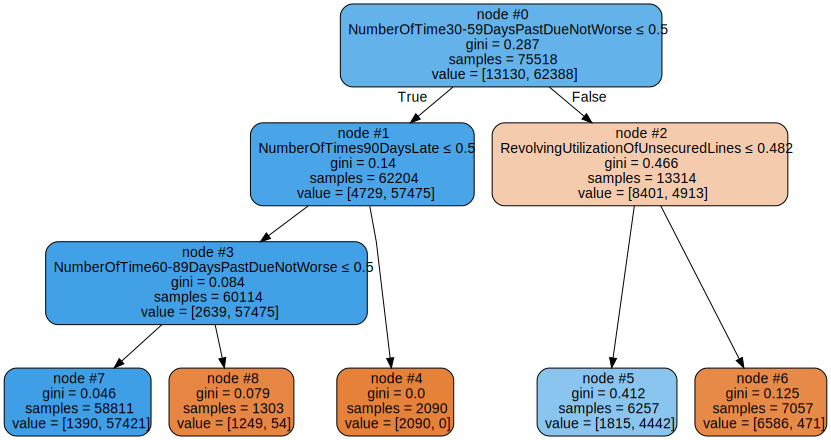

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#from libreria_aux_arboles import tree_to_code, tree_to_pseudo
from graphviz import Source

startbold = '\033[1m'
endbold = '\033[0m'

clf = DecisionTreeClassifier(
    #max_depth=1,
    min_samples_split=0.1, # mínimo número de casos en un nodo para partirlo. 
    min_samples_leaf=0.01,  # mínimo número de casos en nodo hoja.
    max_leaf_nodes=5, # máximo número de nodos hoja
    #min_weight_fraction_leaf=0.05,
    #min_impurity_decrease=0.15
    )

clf = clf.fit(contextos, acciones_predichas)
# clf.classes_
attributes_names = contextos.columns[:10]

#tree_to_code(clf, attributes_names, start_bold=startbold, end_bold=endbold)

display(Source( export_graphviz(clf, out_file=None,
                                feature_names=attributes_names,
                                #class_names=cluster_names,
                                filled=True, rounded=True,
                                special_characters=True,
                                impurity=True,
                                leaves_parallel=True,
                                rotate=False,
                                node_ids=True)))

**Respuesta:**

Utilizando los arboles de decisiones para interpretar el modelo, podemos observar que las características con mayor importancia para el modelo son *NumberOfTime30-59DaysPastDueNotWorse*, *NumberOfTimes90DaysLate*, *NumberOfTime60-89DaysPastDueNotWorse*, *RevolvingUtilizationOfUnsecuredLines*, las cuales coinciden con los resultados obtenidos en la **respuesta 4**. 



### Tarea 7

**Respuesta:**

La tendencia general es *dar crédito*, ya que la probabilidad de encontrar un cliente que no pague es pequeña, si reducimos la penalización el modelo será “menos prudente” y hará que tienda a conceder créditos en un numero mayor de casos. Cuanto más pequeña la penalización, mayor la tendencia. 



### Tarea 8

Una manera de optimizar el modelo podría ser reduciendo el contexto de los clientes utilizando solo las características con mayor importancia en el modelo. Si observamos los resultados obtenidos en la **respuesta 4**, podemos ver que cuando la acción es 1 que las características del cliente que tienen los coeficientes de regresión 0,0 son menos relevantes para la decisión, estás son: *DebtRatio*, *MonthlyIncome*, *NumberOfDependents*, y con la mayor importancia son *RevolvingUtilizationOfUnsecuredLines*, *NumberOfTime30-59DaysPastDueNotWorse*, *NumberOfTimes90DaysLate*, *NumberOfTime60-89DaysPastDueNotWorse*, que son las que coinciden también con la **respuesta 6**. Otra forma de realizar esto, podría ser utilizando librerías como sklearn.feature_selection para obtener las características más importante del modelo. 

In [ ]:
df_train_optimizado = df_train.copy()

In [ ]:
df_train_optimizado = df_train_optimizado.drop(["DebtRatio", "MonthlyIncome", "NumberOfDependents"], axis=1)

In [ ]:
df_train_optimizado.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
135262,0,0.064833,59,0,5,0,1,0
14308,0,0.209079,30,0,7,0,0,0
124448,0,0.411271,58,0,11,0,1,0
113232,0,0.929365,33,1,6,0,1,0
83942,0,0.359039,50,0,7,0,2,0


100%|██████████| 75518/75518 [45:00<00:00, 27.97it/s]


Reward promedio: 0.5066209380545036


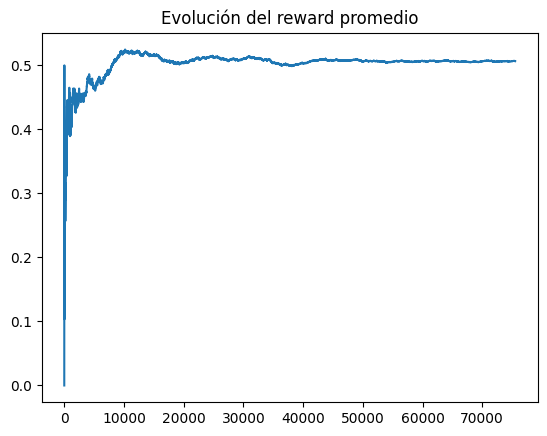

Regret promedio: 0.4933790619454964


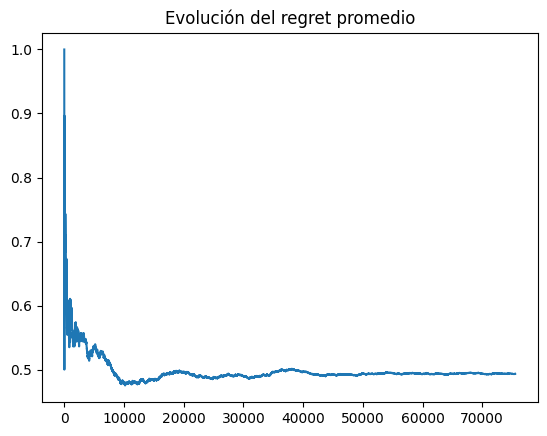

In [ ]:
client = clientes(df_train_optimizado)
n_acciones = 2 # número de promociones diferentes
n_features = len(client.get_context()) # número de variables de contexto (edad e ingresos generados)

agente = LinearBandits(n_acciones, n_features, initial_pulls=100) # initial_pulls: duración de la fase de exploración pura
reward_promedio = []
reward_total = 0
regret_promedio = []
regret_total = 0
N = len(df_train_optimizado)

for i in tqdm(range(N)):
  contexto = client.get_context().values
  accion = agente.action(contexto) # choose_action
  reward = client.get_reward(accion)
  agente.update(contexto, accion, reward) # actualización del modelo

  reward_total += reward
  reward_promedio.append(reward_total/(i+1)) # i+1 es el número de iteraciones
  regret = 1 - reward
  regret_total += regret 
  regret_promedio.append(regret_total/(i+1))
  client.cliente() # cliente con el que contacto

print("Reward promedio:", reward_total/N)
plt.plot(reward_promedio)
plt.title("Evolución del reward promedio")
plt.show()
print("Regret promedio:", regret_total/N)
plt.plot(regret_promedio)
plt.title("Evolución del regret promedio")
plt.show()